In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")


In [6]:
# Load the dataset
df = pd.read_csv("Loan_Default.csv")

# Basic info
print(df.head())
print("\nShape:", df.shape)
print("\nColumns:\n", df.columns)


      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                 

In [8]:
# Encoding all object (categorical) columns using LabelEncoder
encoder = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = encoder.fit_transform(df[col].astype(str))

print("Categorical columns encoded successfully.")


Categorical columns encoded successfully.


In [9]:
# Assuming the target column is 'Status' (1 = default, 0 = non-default)
if 'Status' in df.columns:
    X = df.drop('Status', axis=1)
    y = df['Status']
else:
    raise ValueError("Target column 'Status' not found in dataset.")

print("Feature matrix (X) shape:", X.shape)
print("Target vector (y) shape:", y.shape)


Feature matrix (X) shape: (148670, 33)
Target vector (y) shape: (148670,)


In [10]:
# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training data:", X_train.shape)
print("Testing data:", X_test.shape)


Training data: (118936, 33)
Testing data: (29734, 33)


In [11]:
# Scale numerical features
scaler = StandardScaler()

# Select only numerical columns
num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print("Standard scaling applied to numerical features.")


Standard scaling applied to numerical features.


In [12]:
print("Before scaling (sample):")
display(df[num_cols].head())

print("\nAfter scaling (train sample):")
display(pd.DataFrame(X_train[num_cols], columns=num_cols).head())


Before scaling (sample):


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
0,24890,2019,0,3,1,0,1,0,0,1,...,1740.0,3,758,0,0,2,98.728814,3,1,45.0
1,24891,2019,0,2,1,1,1,0,0,0,...,4980.0,2,552,1,3,2,NaN,0,1,NaN
2,24892,2019,0,2,2,0,1,0,0,1,...,9480.0,3,834,0,1,2,80.019685,3,1,46.0
3,24893,2019,0,2,1,0,4,0,0,1,...,11880.0,3,587,0,2,1,69.376900,0,1,42.0
4,24894,2019,0,1,2,0,1,0,0,1,...,10440.0,1,602,1,0,1,91.886544,0,1,39.0



After scaling (train sample):


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,dtir1
141039,1.555315,0.0,-0.304209,1.323130,-0.402132,-0.519971,0.977773,-0.210446,-0.061352,0.402218,...,-0.090963,1.393802,-0.205652,1.002542,1.147302,0.740642,-1.055865,1.090073,0.013908,-2.630390
121276,1.094371,0.0,-0.304209,-1.521209,-0.402132,-0.519971,-1.639795,-0.210446,-0.061352,0.402218,...,-0.281623,-1.116887,-0.214287,-0.997464,-0.159856,-1.334922,-0.067732,-0.975618,0.013908,1.067446
11214,-1.472671,0.0,-0.304209,-1.521209,-0.402132,-0.519971,0.105251,-0.210446,-0.061352,0.402218,...,-0.635706,-1.116887,-0.922388,-0.997464,0.493723,-1.334922,-0.618016,-0.975618,0.013908,1.636343
129659,1.289893,0.0,-0.304209,-0.573096,-0.402132,-0.519971,0.977773,-0.210446,-0.061352,0.402218,...,0.807862,1.393802,1.676860,1.002542,0.493723,0.740642,0.378332,-0.975618,0.013908,0.119283
13370,-1.422386,0.0,-0.304209,0.375017,-0.402132,-0.519971,-1.639795,-0.210446,-0.061352,0.402218,...,-0.735576,-1.116887,1.694130,-0.997464,1.147302,0.740642,0.084013,-0.975618,0.013908,1.351895


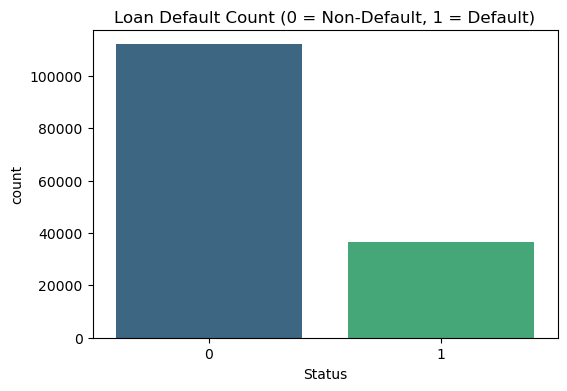

In [14]:

#bar graph of default vs non-default loans
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='Status', data=df, palette='viridis')
plt.title("Loan Default Count (0 = Non-Default, 1 = Default)")
plt.show()


In [16]:
#PREPROCESSING CODES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler


In [17]:
#load the dataset
df = pd.read_csv("Loan_Default.csv")
print("Dataset Loaded Successfully!")


Dataset Loaded Successfully!


In [18]:
#display first 5 rows
print("First 5 Rows of the Dataset:")
display(df.head())


First 5 Rows of the Dataset:


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [19]:
#dataset information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ID                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   Gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   Credit_Worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  Interest_rate_spread       112031 non-null  float64
 13  Upfront_

In [21]:
#checking for missing values
print("Missing Values Count:")
display(df.isnull().sum())


Missing Values Count:


ID                               0
year                             0
loan_limit                    3344
Gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
Credit_Worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
Interest_rate_spread         36639
Upfront_charges              39642
term                            41
Neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
Secured_by                       0
total_units                      0
income                        9150
credit_type                      0
Credit_Score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [22]:
#handling missing values
# Fill numeric columns with mean and categorical with mode
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

print("Missing Values Filled!")
display(df.isnull().sum())


Missing Values Filled!


ID                           0
year                         0
loan_limit                   0
Gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
Credit_Worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
Interest_rate_spread         0
Upfront_charges              0
term                         0
Neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
Secured_by                   0
total_units                  0
income                       0
credit_type                  0
Credit_Score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
LTV                          0
Region                       0
Security_Type                0
Status  

In [23]:
#encoding categorical columns
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print("Categorical Columns Encoded!")
display(df.head())


Categorical Columns Encoded!


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,0,3,0,0,0,0,0,1,...,3,758,0,0,1,98.728814,3,1,1,45.000000
1,24891,2019,0,2,0,1,0,0,0,0,...,2,552,1,3,1,72.746457,0,1,1,37.732932
2,24892,2019,0,2,1,0,0,0,0,1,...,3,834,0,1,1,80.019685,3,1,0,46.000000
3,24893,2019,0,2,0,0,3,0,0,1,...,3,587,0,2,0,69.376900,0,1,0,42.000000
4,24894,2019,0,1,1,0,0,0,0,1,...,1,602,1,0,0,91.886544,0,1,0,39.000000


In [24]:
#normalize numerical columns
scaler = MinMaxScaler()
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

print("Numerical Columns Normalized!")
display(df.head())


Numerical Columns Normalized!


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.6450,0.0,0.000000,1.0,0.012485,1.0,1.0,1.0,0.714286
1,0.000007,0.0,0.0,0.666667,0.0,0.5,0.0,0.0,0.0,0.0,...,0.666667,0.1300,1.0,0.500000,1.0,0.009167,0.0,1.0,1.0,0.584517
2,0.000013,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.8350,0.0,0.166667,1.0,0.010096,1.0,1.0,0.0,0.732143
3,0.000020,0.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,...,1.000000,0.2175,0.0,0.333333,0.0,0.008737,0.0,1.0,0.0,0.660714
4,0.000027,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,...,0.333333,0.2550,1.0,0.000000,0.0,0.011611,0.0,1.0,0.0,0.607143


In [26]:
#final preprocessed dataset
print("Final Processed Dataset:")
display(df.head())

Final Processed Dataset:


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.6450,0.0,0.000000,1.0,0.012485,1.0,1.0,1.0,0.714286
1,0.000007,0.0,0.0,0.666667,0.0,0.5,0.0,0.0,0.0,0.0,...,0.666667,0.1300,1.0,0.500000,1.0,0.009167,0.0,1.0,1.0,0.584517
2,0.000013,0.0,0.0,0.666667,1.0,0.0,0.0,0.0,0.0,1.0,...,1.000000,0.8350,0.0,0.166667,1.0,0.010096,1.0,1.0,0.0,0.732143
3,0.000020,0.0,0.0,0.666667,0.0,0.0,1.0,0.0,0.0,1.0,...,1.000000,0.2175,0.0,0.333333,0.0,0.008737,0.0,1.0,0.0,0.660714
4,0.000027,0.0,0.0,0.333333,1.0,0.0,0.0,0.0,0.0,1.0,...,0.333333,0.2550,1.0,0.000000,0.0,0.011611,0.0,1.0,0.0,0.607143
